# **About this Project:**

This is a Machine learning Capstone project. It is a Linear Regression problem statement.

This dataset contains information like price of shares,No. of treds,No. of shares,Deliverable Quantity,Spread High-Low,Spread Close-Open from Jan 2012 to 21st April 2022.(span- 10years)

# **Group Name - DSA (Data Science Aspirants)**

Unnati Joshi

komal Dhokai

Dharvi Jagad

Keyur Prajapti

# **Project Title - Nestle Stock Price Prediction**

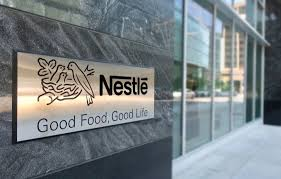

# **Problem Statment** 
Before Investing into any company an investor should study Historical stock Prices of that company , analyze the Opening-closing and High/Low Prices for better understanding of the performance of that company in share markets. Here we are predicting the Closing Price of Nestle Shares with the available Independent Features.

# What is stock?
A stock, also known as equity, is a security that represents the ownership of a fraction of the issuing corporation. Units of stock are called "shares" which entitles the owner to a proportion of the corporation's assets and profits equal to how much stock they own.

info_stock_mobile_v2.svg

# What is stock price prediction?
Stock market prediction is the act of trying to determine the future value of a company stock or other financial instrument traded on an exchange. The successful prediction of a stock's future price could yield significant profit.

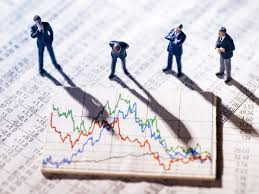

# **Data Description**

# Key Attribute of Data set:

**Date:** It shows the Date of that day and in this Data set it is uniquely define

**Open Price:** The opening price is the price from the first transaction of a business day.

**High Price:** The highest price at which a stock traded during the course of the trading day and is typically higher than the closing or equal to          the opening.

**Low Price:** The lowest price that a stock trades in that day.

**Close Price:** The closing price is the last price anyone paid for a share of that stock during the business hours of the exchange where the                 stock trades.

**WAP:** Weighted Average Price Of The Day.

**No.of Shares:** Tells us how many shares of a company are currently owned by investors.

**No. of Trades:** The total number of shares transacted between a buyer and seller during transation.

**Total Turnover (Rs.):** (It's multiplication of WAP and No.of shares in a day)Total Stock turnover is considered to be a measure of sales performance

**Deliverable Quantity:** Deliverable quantity is the total number of shares that were marked for delivery on a certain date.

**% Deli. Qty to Traded Qty :** Persentage of Deliverable Quantity's value

**Spread High-Low:** The difference between the highest price that a buyer is willing to pay for an asset and the lowest price that a seller is willing to accept.

**Spread Close-Open:** The difference between the close price that a buyer is willing to pay for an asset and the open price that a seller is willing to accept.

# Import Neccesary Libraries

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm

# **Data Preparation**

#### Read the dataset and print the first five observations.

In [60]:
# load the csv file
# store the data in 'df_nestle'
df_nestle=pd.read_csv("nestle.csv")

# display first five observations using head()
df_nestle.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,21-April-2022,18150.000000,18572.950000,17772.900000,18205.800000,18130.183442,4590,1770,83217542.000000,950.000000,20.700000,800.050000,55.800000
1,20-April-2022,18100.100000,18415.000000,18017.150000,18313.700000,18295.559071,6069,1321,111035748.000000,4677.000000,77.060000,397.850000,213.600000
2,19-April-2022,18470.050000,18718.000000,17845.600000,17943.150000,18355.093320,2904,716,53303191.000000,1619.000000,55.750000,872.400000,-526.900000
3,18-April-2022,18294.500000,18684.500000,18294.500000,18549.850000,18511.224599,1496,586,27692792.000000,557.000000,37.230000,390.000000,255.350000
4,13-April-2022,18371.200000,18549.300000,18248.250000,18343.900000,18388.967826,1150,550,21147313.000000,573.000000,49.830000,301.050000,-27.300000


In [32]:
# use 'shape' to check the dimension of data
df_nestle.shape

(2553, 13)

**Interpretation:** The data has 2553 observations and 13 columns.

In [61]:
# Change Column name for better understanding
df_nestle.rename(columns={'Date':'Date',
                          'Open Price':'Open_Price',
                          'High Price':'High_Price',
                          'Low Price':'Low_Price',
                          'Close Price':'Close_Price',
                          'WAP':'Weighted_Average_Price',
                          'No.of Shares':'Number_Of_Share',
                          'No. of Trades':'Number_Of_Trades',
                          'Total Turnover (Rs.)':'Total_Turnover_In_Ruppes',
                          'Deliverable Quantity':'Deliverable_Quantity',
                          '% Deli. Qty to Traded Qty':'Percentage_Of_Deliverable_Qty_To_Traded_Qty',
                          'Spread High-Low':'Spread_High_Low',
                          'Spread Close-Open':'Spread_Close_Open'},inplace=True)

In [6]:
# use 'info()' to understand the dataset and it also tells that null value are present or not 
df_nestle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2553 entries, 0 to 2552
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Date                                         2553 non-null   object 
 1   Open_Price                                   2553 non-null   float64
 2   High_Price                                   2553 non-null   float64
 3   Low_Price                                    2553 non-null   float64
 4   Close_Price                                  2553 non-null   float64
 5   Weighted_Average_Price                       2553 non-null   float64
 6   Number_Of_Share                              2553 non-null   int64  
 7   Number_Of_Trades                             2553 non-null   int64  
 8   Total_Turnover_In_Ruppes                     2553 non-null   float64
 9   Deliverable_Quantity                         2551 non-null   float64
 10  

**Interpretation:** The data have 1 categorical column and contain 4 null value that columns are Deliverable Quantity and % Deli. Qty to Traded Qty.

# Null Value Tretment

In [62]:
df_nestle.isnull().sum()*100/len(df_nestle)

Date                                          0.000000
Open_Price                                    0.000000
High_Price                                    0.000000
Low_Price                                     0.000000
Close_Price                                   0.000000
Weighted_Average_Price                        0.000000
Number_Of_Share                               0.000000
Number_Of_Trades                              0.000000
Total_Turnover_In_Ruppes                      0.000000
Deliverable_Quantity                          0.078339
Percentage_Of_Deliverable_Qty_To_Traded_Qty   0.078339
Spread_High_Low                               0.000000
Spread_Close_Open                             0.000000
dtype: float64

In [63]:
#Drop null value
df_nestle.dropna(inplace=True)
# after drop value check shape
df_nestle.shape

(2551, 13)

**Interpretation:**Here 0.3% Null value so, we drop null value.

# EDA

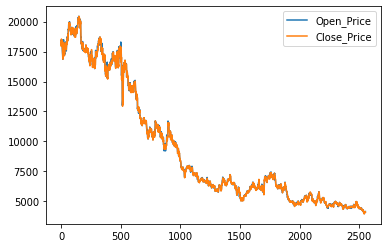

In [9]:
plt.plot('Open_Price',data=df_nestle,)
plt.plot('Close_Price',data=df_nestle)
plt.legend()

 **Interpretation:** Here we see that open price and close price have not too much difference

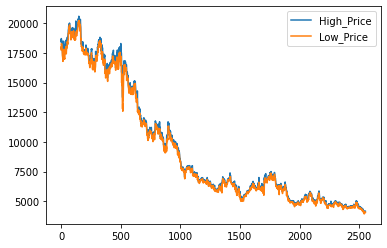

In [20]:
plt.plot('High_Price',data=df_nestle)
plt.plot('Low_Price',data=df_nestle)
plt.legend()

**Interpretation:** Here we see that high price and low price have not too much difference

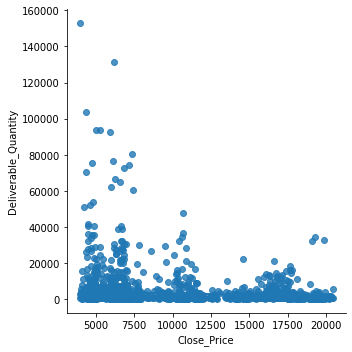

In [27]:
sns.lmplot(x='Close_Price',y='Deliverable_Quantity',data=df_nestle)

**Interpretation:** Here we see that when close price is small that time Deliverable_Quantity is high.

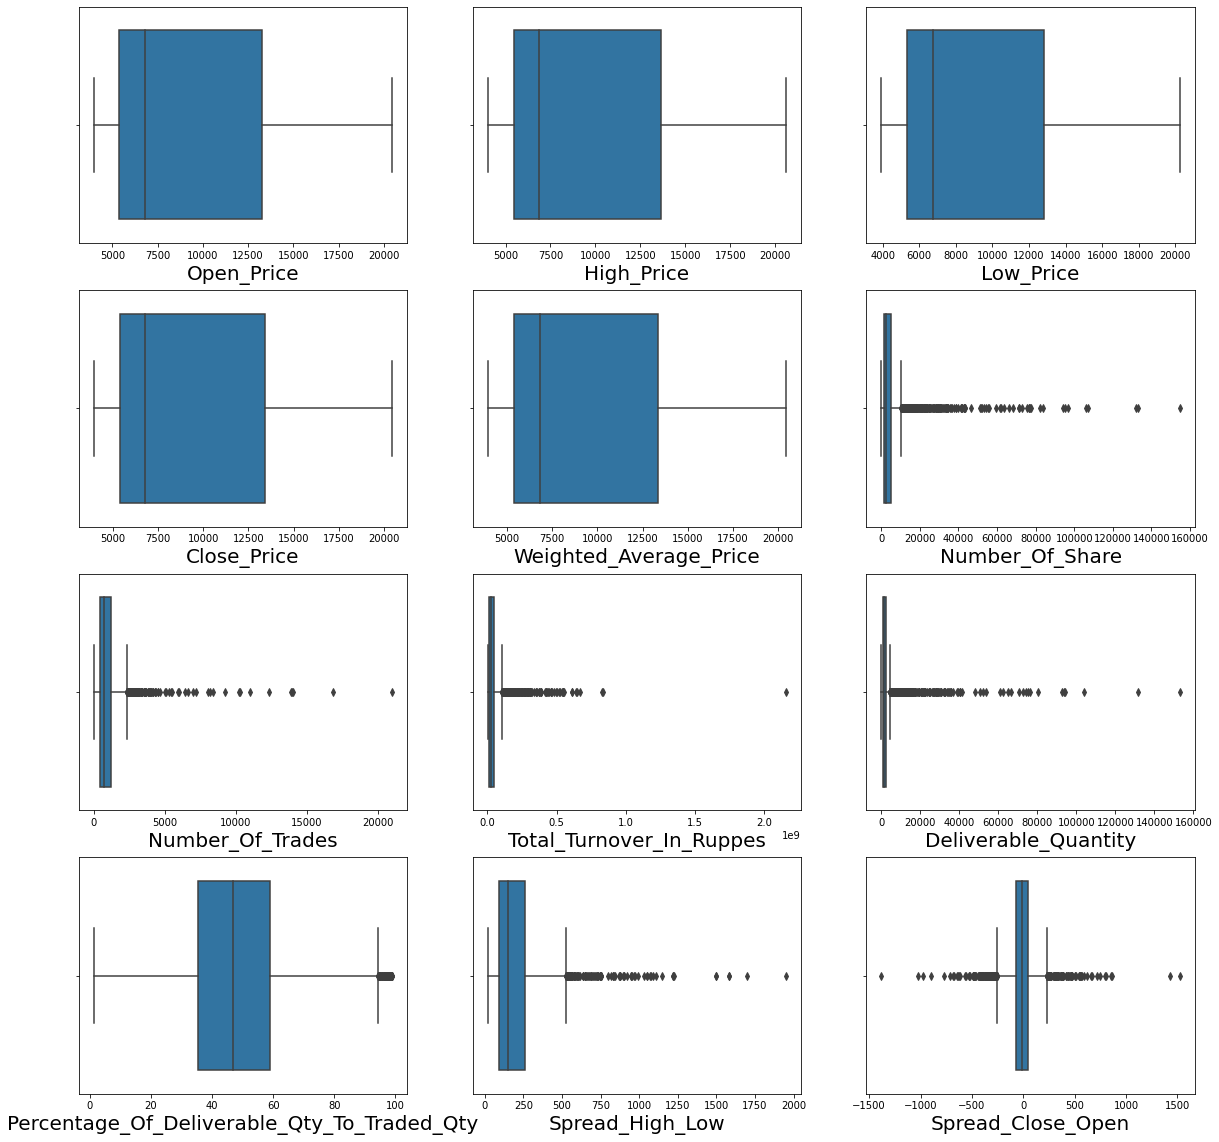

In [99]:
# using boxplot graph we check outlier
df_num = df_nestle.select_dtypes(include=[np.number])
fig, ax = plt.subplots(4,3, figsize=(20, 20))

for variable, subplot in zip(df_num.columns, ax.flatten()):
    z = sns.boxplot(x = df_num[variable], orient = "h",whis=1.5 , ax=subplot) 
    z.set_xlabel(variable, fontsize = 20)                                     

**Interpretation:** Here we see that Number_Of_Share ,Number_Of_Trades Total_Turnover_in_Ruppes
,Deliverable_Quantity,Percentage_Of_Deliverable_Qty_To_Traded_Qty ,
Spread_High_Low ,Spread_Close_open have Outlier

**Interpretation:**Stock market data so,price is high and low so we not do outlier treatment.

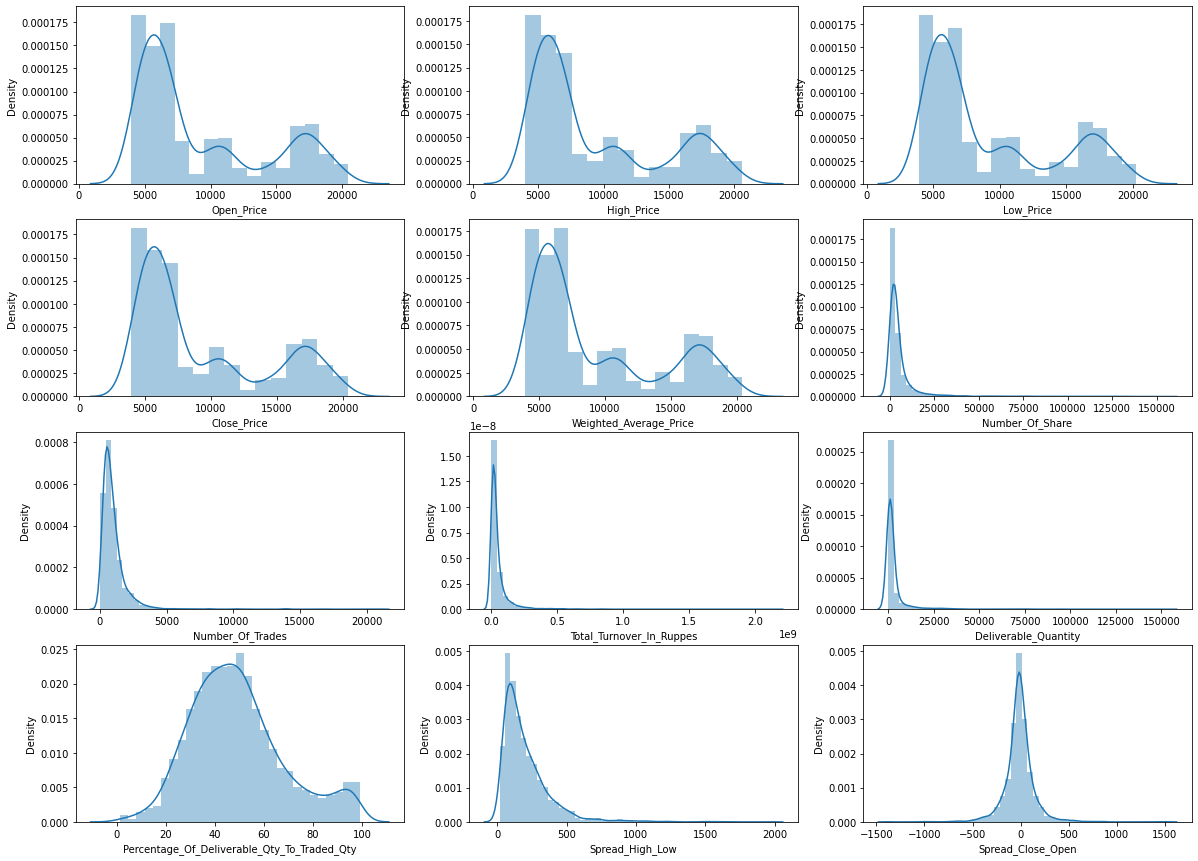

In [29]:
num_col=[col for col in df_nestle.columns if df_nestle[col].dtype!='object']
plt.figure(figsize=(20,15))
plotnumber=1
for column in num_col:
      if plotnumber<=14:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df_nestle[column])
        plt.xlabel(column)
      plotnumber+=1

In [10]:
df_nestle.skew()

Open_Price                                    0.838943
High_Price                                    0.834516
Low_Price                                     0.841663
Close_Price                                   0.837990
Weighted_Average_Price                        0.836785
Number_Of_Share                               6.503484
Number_Of_Trades                              7.154183
Total_Turnover_In_Ruppes                      8.950938
Deliverable_Quantity                          8.153823
Percentage_Of_Deliverable_Qty_To_Traded_Qty   0.602990
Spread_High_Low                               2.959270
Spread_Close_Open                             0.397781
dtype: float64

**Interpretation:**Here we see that Spread_Close_Open is Normally distributed and Number_Of_Share,Number_Of_Trades,Total_Turnover_In_Ruppes,Deliverable_Quantity are positively skewed i.e. mostly all number are increase and mean>median>mode.

<AxesSubplot:>

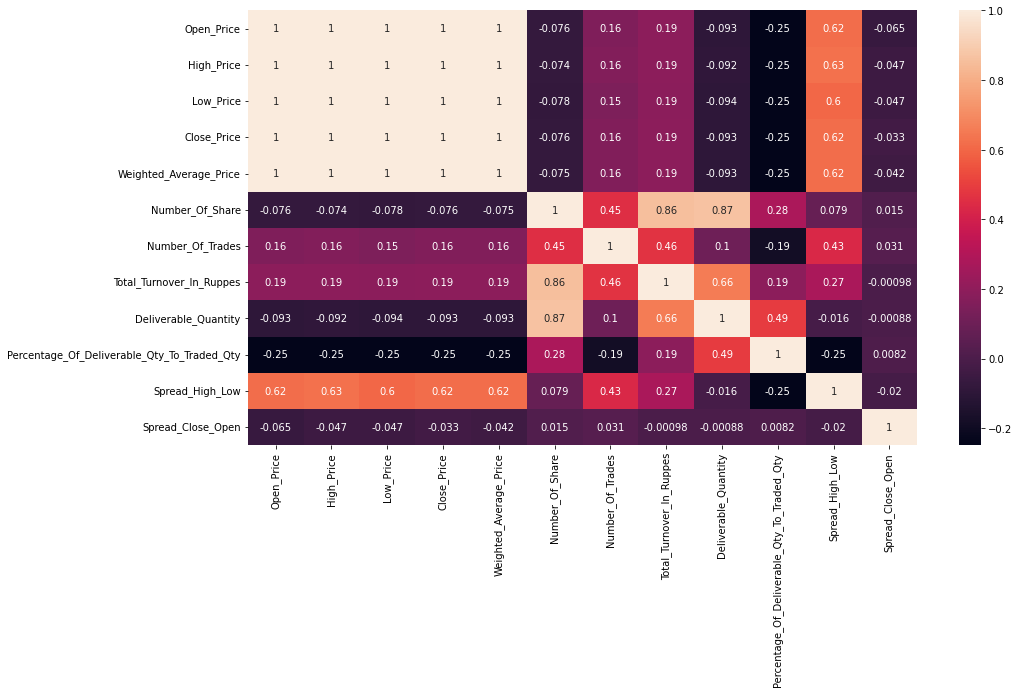

In [37]:
plt.figure(figsize=(15,8))
sns.heatmap(df_nestle.corr(),annot=True)

**Interpretation:** Target Variavle Close_price have more correation with open,high,low,WAP

# Feature Extraction

In [64]:
# date column contain unique value so, not give any information i.e we extract further into day,month and year

# 1st convert datatype object to datetime 
df_nestle['Date']=pd.to_datetime(df_nestle['Date'])

# Divide into Day,Month,Year
df_nestle['Day']=df_nestle['Date'].dt.weekday
df_nestle['Month']=df_nestle['Date'].dt.month
df_nestle['Year']=df_nestle['Date'].dt.year

#Then we drop Date column to main dataframe
df_nestle.drop('Date',axis=1,inplace=True)

In [65]:
#Then check dataframe
df_nestle.head()

,Open_Price,High_Price,Low_Price,Close_Price,Weighted_Average_Price,Number_Of_Share,Number_Of_Trades,Total_Turnover_In_Ruppes,Deliverable_Quantity,Percentage_Of_Deliverable_Qty_To_Traded_Qty,Spread_High_Low,Spread_Close_Open,Day,Month,Year
0,18150.000000,18572.950000,17772.900000,18205.800000,18130.183442,4590,1770,83217542.000000,950.000000,20.700000,800.050000,55.800000,3,4,2022
1,18100.100000,18415.000000,18017.150000,18313.700000,18295.559071,6069,1321,111035748.000000,4677.000000,77.060000,397.850000,213.600000,2,4,2022
2,18470.050000,18718.000000,17845.600000,17943.150000,18355.093320,2904,716,53303191.000000,1619.000000,55.750000,872.400000,-526.900000,1,4,2022
3,18294.500000,18684.500000,18294.500000,18549.850000,18511.224599,1496,586,27692792.000000,557.000000,37.230000,390.000000,255.350000,0,4,2022
4,18371.200000,18549.300000,18248.250000,18343.900000,18388.967826,1150,550,21147313.000000,573.000000,49.830000,301.050000,-27.300000,2,4,2022


In [66]:
# Give name to the days
df_nestle_new=df_nestle.copy()
Days={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df_nestle_new['Day']=df_nestle_new['Day'].map(Days)
df_nestle_new.head()

,Open_Price,High_Price,Low_Price,Close_Price,Weighted_Average_Price,Number_Of_Share,Number_Of_Trades,Total_Turnover_In_Ruppes,Deliverable_Quantity,Percentage_Of_Deliverable_Qty_To_Traded_Qty,Spread_High_Low,Spread_Close_Open,Day,Month,Year
0,18150.000000,18572.950000,17772.900000,18205.800000,18130.183442,4590,1770,83217542.000000,950.000000,20.700000,800.050000,55.800000,Thursday,4,2022
1,18100.100000,18415.000000,18017.150000,18313.700000,18295.559071,6069,1321,111035748.000000,4677.000000,77.060000,397.850000,213.600000,Wednesday,4,2022
2,18470.050000,18718.000000,17845.600000,17943.150000,18355.093320,2904,716,53303191.000000,1619.000000,55.750000,872.400000,-526.900000,Tuesday,4,2022
3,18294.500000,18684.500000,18294.500000,18549.850000,18511.224599,1496,586,27692792.000000,557.000000,37.230000,390.000000,255.350000,Monday,4,2022
4,18371.200000,18549.300000,18248.250000,18343.900000,18388.967826,1150,550,21147313.000000,573.000000,49.830000,301.050000,-27.300000,Wednesday,4,2022


In [67]:
# Give name to the month
month={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Auguest',9:'September',
      10:'October',11:'November',12:'December'}
df_nestle_new['Month']=df_nestle_new['Month'].map(month)
df_nestle_new.head()

,Open_Price,High_Price,Low_Price,Close_Price,Weighted_Average_Price,Number_Of_Share,Number_Of_Trades,Total_Turnover_In_Ruppes,Deliverable_Quantity,Percentage_Of_Deliverable_Qty_To_Traded_Qty,Spread_High_Low,Spread_Close_Open,Day,Month,Year
0,18150.000000,18572.950000,17772.900000,18205.800000,18130.183442,4590,1770,83217542.000000,950.000000,20.700000,800.050000,55.800000,Thursday,April,2022
1,18100.100000,18415.000000,18017.150000,18313.700000,18295.559071,6069,1321,111035748.000000,4677.000000,77.060000,397.850000,213.600000,Wednesday,April,2022
2,18470.050000,18718.000000,17845.600000,17943.150000,18355.093320,2904,716,53303191.000000,1619.000000,55.750000,872.400000,-526.900000,Tuesday,April,2022
3,18294.500000,18684.500000,18294.500000,18549.850000,18511.224599,1496,586,27692792.000000,557.000000,37.230000,390.000000,255.350000,Monday,April,2022
4,18371.200000,18549.300000,18248.250000,18343.900000,18388.967826,1150,550,21147313.000000,573.000000,49.830000,301.050000,-27.300000,Wednesday,April,2022


In [68]:
y=df_nestle_new.groupby('Year')['Close_Price'].sum()
y

Year
2012   1139505.250000
2013   1258109.850000
2014   1315753.900000
2015   1600729.900000
2016   1511218.000000
2017   1681698.700000
2018   2317396.050000
2019   2975752.200000
2020   4152809.650000
2021   4497326.300000
2022   1331620.350000
Name: Close_Price, dtype: float64

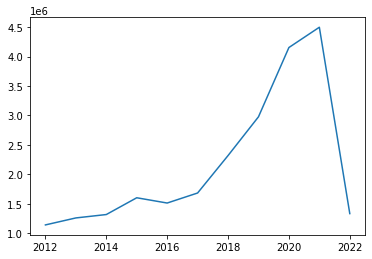

In [16]:
plt.plot(y)

**Interpretation:**In year 2021 close price is high,

<AxesSubplot:xlabel='Year', ylabel='Number_Of_Trades'>

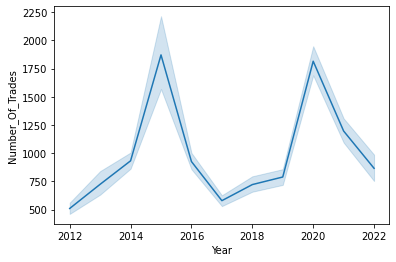

In [50]:
sns.lineplot(x='Year',y='Number_Of_Trades',data=df_nestle_new)

**Interpretation:** In year 2015 and 2020 No.of trades high i.e. Intraday happen more.

<AxesSubplot:xlabel='Month', ylabel='Close_Price'>

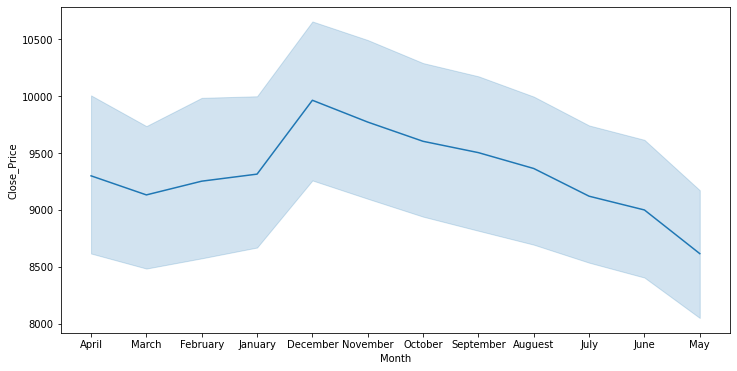

In [51]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Month',y='Close_Price',data=df_nestle_new)

**Interpretation:**In month 12 close price is high and also we see that after month 6 price is increase.

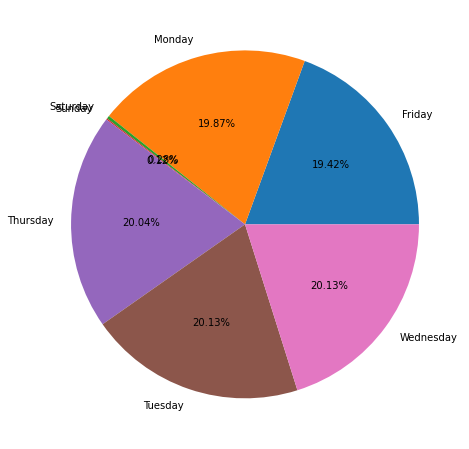

In [69]:
df_day=df_nestle_new.groupby('Day')['Close_Price'].sum().reset_index()
plt.figure(figsize=(10,8))
plt.pie(df_day['Close_Price'],labels=df_day['Day'],autopct='%1.2f%%')
plt.show()

**Interpretation:** Here we see that saturday and sunday market is close so value is low and Tuesday,Wednesday,Thursday
stock close price are more

# Filter numerical and categorical variables

In [73]:
#Target Variable
df_target=df_nestle['Close_Price']

#Numeric variable
df_feature=df_nestle.select_dtypes(include=['number'])

#Drop Target Variable
df_feature=df_feature.drop("Close_Price",axis=1)

#Categorical variable
df_cat=df_nestle.select_dtypes(include=['object'])

# Scale Data

In [80]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scalled = ss.fit_transform(df_feature)
df_scale=pd.DataFrame(scalled,columns=df_feature.columns)
df_scale.head()

,Open_Price,High_Price,Low_Price,Close_Price,Weighted_Average_Price,Number_Of_Share,Number_Of_Trades,Total_Turnover_In_Ruppes,Deliverable_Quantity,Percentage_Of_Deliverable_Qty_To_Traded_Qty,Spread_High_Low,Spread_Close_Open,Day,Month,Year
0,1.784804,1.834689,1.752755,1.801568,1.786903,-0.089483,0.673071,0.418534,-0.267485,-1.481716,3.413743,0.436242,0.698321,-0.684029,1.792207
1,1.774700,1.803002,1.802836,1.823451,1.820465,0.052472,0.278437,0.745633,0.163325,1.466601,1.114947,1.435815,-0.003854,-0.684029,1.792207
2,1.849610,1.863787,1.767661,1.748301,1.832547,-0.251306,-0.253307,0.066789,-0.190154,0.351828,3.827263,-3.254831,-0.706028,-0.684029,1.792207
3,1.814063,1.857066,1.859704,1.871343,1.864232,-0.386447,-0.367566,-0.234349,-0.312912,-0.616994,1.070080,1.700278,-1.408203,-0.684029,1.792207
4,1.829594,1.829944,1.850221,1.829575,1.839421,-0.419656,-0.399207,-0.311314,-0.311062,0.042140,0.561681,-0.090149,-0.003854,-0.684029,1.792207


# Train Test Split

In [81]:
X_full = df_scale.copy()

y_full = df_target.copy()

X_full = sm.add_constant(X_full)
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, random_state=1, test_size = 0.3)

print('X_train_full', X_train_full.shape)
print('y_train_full', y_train_full.shape)

print('X_test_full', X_test_full.shape)
print('y_test_full', y_test_full.shape)

X_train_full (1785, 16)
y_train_full (1785,)
X_test_full (766, 16)
y_test_full (766,)


In [83]:
# after split not come error that why we reset index
X_train_full=X_train_full.reset_index(drop=True)
y_train_full=y_train_full.reset_index(drop=True)
X_test_full=X_test_full.reset_index(drop=True)
y_test_full=y_test_full.reset_index(drop=True)

# Make Base Model

In [86]:
MLR_base_model=sm.OLS(y_train_full,X_train_full).fit()
print(MLR_base_model.summary())

                            OLS Regression Results                            
Dep. Variable:            Close_Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.100e+29
Date:                Sat, 15 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:44:55   Log-Likelihood:                 39347.
No. Observations:                1785   AIC:                        -7.867e+04
Df Residuals:                    1771   BIC:                        -7.859e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

**Interpretation:** Rsquared is a score of variation present in a target variable explain by independent variable
#R^2=1 means 100% variation

# Model Evaluation

In [85]:
# R_Squerd
print("Base Model evolution")

x = MLR_base_model.rsquared
print("R Squared = ",x)
print("here in our case",x,"percent target veriable explain by Indepandant veriable")
print("----------------------------------------------------------------------------------")

# Ad_R_squared
y = MLR_base_model.rsquared_adj
print("adj R Squared = ",y)
print("here in our case",y,"percent target values explain by Indepandant veriable")
print("-----------------------------------------------------------------------------------")

# Condition No
z = MLR_base_model.condition_number
print("Condition Number",z)
print("Here in our case condition number is",z,"so the Severe Multicollinearity is present in the data")
print("-----------------------------------------------------------------------------------")

# Durbin Watson
# take it manually
a = 1.971
print("durbin Watson",a)
print("Here in our case Durbin watson score is",a,"so it meanse there is no autocorrelation")

Base Model evolution
R Squared =  1.0
here in our case 1.0 percent target veriable explain by Indepandant veriable
----------------------------------------------------------------------------------
adj R Squared =  1.0
here in our case 1.0 percent target values explain by Indepandant veriable
-----------------------------------------------------------------------------------
Condition Number 2.2408920650694776e+16
Here in our case condition number is 2.2408920650694776e+16 so the Severe Multicollinearity is present in the data
-----------------------------------------------------------------------------------
durbin Watson 1.971
Here in our case Durbin watson score is 1.971 so it meanse there is no autocorrelation


# Model performance

In [88]:
#training data
train_predict=MLR_base_model.predict(X_train_full)
train_predict.head()

#testing data
test_predict=MLR_base_model.predict(X_test_full)
test_predict.head()

0   10521.050000
1   16374.150000
2    5152.700000
3    9810.400000
4    7194.800000
dtype: float64

**Interpretation:** Predict value of X_train_full and X_test_full.

In [89]:
#for train data
# MAE (Mean Absolute Error)
print("Base Model Performance")

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_train_full,train_predict)
print("Mean Absolute Error is",round(MAE,2))
print("-----------------------------------------------------------------------------------\n")

# MSE (Mean Squared Error)
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_train_full,train_predict)
print("Mean Absolute Error is",round(MSE,2))
print("-----------------------------------------------------------------------------------\n")

# RMSE (Root Mean Squared Error)
RMSE = np.sqrt(MSE)
print("Mean Squared Error is", round(RMSE,2))
print("-----------------------------------------------------------------------------------\n")


Base Model Performance
Mean Absolute Error is 0.0
-----------------------------------------------------------------------------------

Mean Absolute Error is 0.0
-----------------------------------------------------------------------------------

Mean Squared Error is 0.0
-----------------------------------------------------------------------------------



**Interpretation:** Here we see that in train data error are zero.

In [90]:
#for test data
# MAE (Mean Absolute Error)
print("Base Model Performance")

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test_full,test_predict)
print("Mean Absolute Error is",round(MAE,2))
print("-----------------------------------------------------------------------------------\n")

# MSE (Mean Squared Error)
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test_full,test_predict)
print("Mean Absolute Error is",round(MSE,2))
print("-----------------------------------------------------------------------------------\n")

# RMSE (Root Mean Squared Error)
RMSE = np.sqrt(MSE)
print("Mean Squared Error is", round(RMSE,2))
print("-----------------------------------------------------------------------------------\n")


Base Model Performance
Mean Absolute Error is 0.0
-----------------------------------------------------------------------------------

Mean Absolute Error is 0.0
-----------------------------------------------------------------------------------

Mean Squared Error is 0.0
-----------------------------------------------------------------------------------



**Interpretation:** Here we see that in test data error are zero. Train and test both data error is zero i.e. overfitting or underfitting not happen and model is accurately predicted

# Final Model

In [92]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr_model=lr.fit(X_train_full,y_train_full) 
print("Train data accuracy",round(lr_model.score(X_train_full,y_train_full),2))
print("Test data accuracy",round(lr_model.score(X_test_full,y_test_full),2))

Train data accuracy 1.0
Test data accuracy 1.0


In [94]:
# Predict value of x test
y_pred=lr.predict(X_test_full)
lr_new=pd.DataFrame({'Actual Value':y_test_full,'Predicted_value':y_pred})
lr_new.head()

,Actual Value,Predicted_value
0,10521.050000,10521.050000
1,16374.150000,16374.150000
2,5152.700000,5152.700000
3,9810.400000,9810.400000
4,7194.800000,7194.800000


# Model Performance

In [96]:
from sklearn.metrics import r2_score
print("R-score",r2_score(y_test_full,y_pred))

from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test_full,y_pred))

RMSE = np.sqrt(MSE)
print("RMSE",RMSE)

R-score 1.0
MSE 1.8220110816319792e-23
RMSE 6.242253630507445e-11
